# Final Project: K-means clustering

## POP77001 Computer Programming for Social Scientists

## Overview

In the final project we will be putting together the topics covered throuthout the module. You will write several functions and apply them to a real-world dataset.

You will be asked to implement a number of functions that altogether can do naive [k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering). K-means clustering is available as a built-in routine or functionality provided by external libraries in both R and Python. However, here, instead of relying on these pre-existing tools, we will write our own solution to help illuminate the workings of one of the most basic unsupervised machine learning algorithms and how it can be applied to real world data.

As our dataset you will be analysing [Airbnb listings in Dublin (from 11 September 2022)](http://data.insideairbnb.com/ireland/leinster/dublin/2022-09-11/data/listings.csv.gz). This data was collected by [Inside Airbnb](http://insideairbnb.com), independent project to assess the impact of Airbnb platform on urban living.

You can use either Python or R to implement your solutions. Solutions that mix Python and R code (either within one part or across parts) will not be accepted.

Keep your functions simple and streamlined. Do not 'overengineer' your solutions (especially when implementing k-means algorithm). Do not use external libraries other than those specified for each part.

## Part 1: Calculate distance

Write a function called `get_distance` that finds the [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between two points.

Function takes 2 arguments:
- `p` - sequence of first point's coordinates (in n dimensions)
- `q` - sequence of second point's coordinates (in n dimensions)

Function returns 1 object:
- `dist` - floating-point value representing the Euclidean distance between the input points

Example input → output:
- $[5, 1, 3, 12, 7]$ and $[10, 8, 3, 9, 11]$ → $9.9499$

External libraries:
- None

In [524]:
# Part 1:

# Your code goes here

def get_distance(p, q):
    dist =0
    for i in range(len(p)):
        dist = dist + ((p[i]-q[i])**2)
    return (dist**(0.5))

get_distance([5,1,3,12,7],[10,8,3,9,11]) 

9.9498743710662

## Part 2: Calculate centroid

Write a function called `get_centroid` that finds the centroid of multiple points in n dimensions. The function should take some sequence (e.g. list in Python or R) as an input and return the centroid of these points.

Function takes 1 argument:
- `points` - sequence of points' coordinates (in n dimensions)

Function returns 1 object:
- `centroid` - sequence of centroid's coordinates (in n dimensions)

Example input → output:
- $[[0,1,2,3,4], [5,6,7,8,9]]$ → $[2.5, 3.5, 4.5, 5.5, 6.5]$

External libraries:
- None

In [525]:
# Part 2:

# Your code goes here
def get_centroid(a):
    m = len(a)
    cent = [sum(k)/m for k in zip(*a)]
    return cent

get_centroid([[0,1,2,3,4],[5,6,7,8,9]]) 

[2.5, 3.5, 4.5, 5.5, 6.5]

inspired by https://stackoverflow.com/questions/14050824/add-sum-of-values-of-two-lists-into-new-list

## Part 3: K-means algorithm

Write that a function called `k_means` that implements K-means algorithm. The general functioning of the algorithm is as follows:
- A random set of k points are picked as cluster centroids
- The distance between each input point and each centroid is calculated (use `get_distance()` function from above)
- Each point is assigned to a cluster, whose centroid is the closest
- New cluster centroids are calculated (use `get_centroid()` function from above)
- Repeat until convergence (stopping rule)
- Stopping rule can be implemented in 2 different ways:
    - Cluster assignments stop changing
    - Manually specified number of iterations (optionally exposed as an argument)

Function takes 2 arguments:
- `points` - sequence of points' coordinates (in n dimensions)
- `k` - number of clusters

Function returns 1 object:
- `clusters` - sequence of points' assignments to clusters (the order should correspond to the order of points' coordinates in the input sequence)

Print out:
- `centroids` - coordinates of final centroids after algorithm's convergence

Example input → output:
- $[[0,1,2,3,4], [1,2,3,4,5], [5,6,7,8,9]]$ and $2$ → $[1, 1, 2]$ or $[2, 2, 1]$  
(output cluster numbers in Python could also be $[0, 0, 1]$ or $[1, 1, 0]$)

- Centroids: $[[0.5, 1.5, 2.5, 3.5, 4.5], [5.0, 6.0, 7.0, 8.0, 9.0]]$

External libraries:
- None for R
- `sample()` method from `random` built-in module for Python to initialize the first random centroids


In [526]:
# Part 3:

# Your code goes here
import random
from random import sample
import numpy as np


In [527]:
def k_means(points, k):
    def cent(points, initial_centroid, distances):  # define the function to allocate points to their closest centroids
        centroids = [i for p in range(len(points)) for i in range(len(initial_centroid)) if get_distance(points[p],initial_centroid[i]) == min(distances[p])]  # It returns the index, or label, of the centroids into a list
        return centroids
    
    initial_centroid = random.sample(points, k)  # initialise centroid randomly 
    distances = [[get_distance(p, i) for i in initial_centroid] for p in points]  # get the distance between points and initial centroids
    centro_index = cent(points, initial_centroid, distances) # get the list of index, or label of which clusters points belong to in the first round
    print(centro_index)
    
    
    for n in range(1, 2000):   # repreat 2000 times, manually specified number of interations 
        clusters = [[points[point_index] for point_index in range(len(points)) if cluster_index == centro_index[point_index]] for cluster_index in range(len(initial_centroid))]   # clustering, get the points of the same calusters in a list 
        new_centroid = [get_centroid(clusters[i]) for i in range(len(clusters))]  # get new centroids of points in the same clusters 
        new_distances = [[get_distance(p, i) for i in new_centroid] for p in points] # calcualte the new distance of points to the new centroids 
        centro_index = cent(points, new_centroid, new_distances) # get the index, or label, of new centroids 
    print(new_centroid)
    return centro_index


In [528]:
k_means([[0,1,2,3,4],[1,2,3,4,5],[5,6,7,8,9]], 2)    # the result of centroids does not change 

[0, 1, 1]
[[0.5, 1.5, 2.5, 3.5, 4.5], [5.0, 6.0, 7.0, 8.0, 9.0]]


[0, 0, 1]

Get how to use sample() here https://www.geeksforgeeks.org/python-random-sample-function/

Also inspired by https://www.dominodatalab.com/blog/getting-started-with-k-means-clustering-in-python

## Part 4: K-means clustering

- Load the Airbnb Dublin dataset either using a downloaded file stored on your local machine or by reading it in directly using one of the 2 URLs below:
    - `https://github.com/ASDS-TCD/POP77001_Computer_Programming_2022/blob/main/data/listings.csv.gz?raw=true`
    - `http://data.insideairbnb.com/ireland/leinster/dublin/2022-09-11/data/listings.csv.gz`

- Apply `k_means()` function implemented above to listings' coordinates (stored in columns 'longitude' and 'latitude') of the Airbnb Dublin dataset. Fit the algorithm with $k = 3$ and $k = 5$ settings.
    - For replication purposes set the seed before running `k_means()` function as the initial random centroid selection can affect your results.
    - In Python use `random.seed(2022)` from `random` module
    - In R use `set.seed(2022)` available as built-in function

- How many listings fall into each cluster?
- Use [online map](https://www.openstreetmap.org/) to position the geographic locations of centroids. Where in Dublin are they, roughly, located?

- Add 2 new columns to the dataset with cluster assignments (for 3 and 5 clusters) for each listing.

- Save the updated dataset as a CSV file on your local machine.

External libraries:
- Optionally, `readr` for R
- `pandas` for Python

In [529]:
# Part 4:

# Your code goes here
import pandas as pd

AirDub = pd.read_csv("http://data.insideairbnb.com/ireland/leinster/dublin/2022-09-11/data/listings.csv.gz")

AirDub.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20220911231053,2022-09-12,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,...,4.93,4.66,4.82,NaN,f,2,0,2,0,1.85
1,85156,https://www.airbnb.com/rooms/85156,20220911231053,2022-09-12,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,...,4.88,4.64,4.78,NaN,f,2,0,2,0,1.53
2,159889,https://www.airbnb.com/rooms/159889,20220911231053,2022-09-12,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,...,4.90,4.63,4.74,NaN,f,3,0,3,0,2.78
3,162809,https://www.airbnb.com/rooms/162809,20220911231053,2022-09-11,city scrape,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",https://a0.muscache.com/pictures/86694529/c07b...,777681,...,4.97,4.77,4.85,NaN,f,2,0,2,0,3.68
4,165828,https://www.airbnb.com/rooms/165828,20220911231053,2022-09-11,city scrape,Pádraig Pearse apt. Kilmainham,"Don't just visit Dublin, experience Dublin in ...","Enjoy a walk along the grand canal, or just ob...",https://a0.muscache.com/pictures/34311419/b3f6...,790601,...,4.75,4.34,4.55,NaN,t,5,5,0,0,0.48


In [530]:
cols = ['longitude', 'latitude']
AirDub[cols].values.tolist()

[[-6.25792, 53.29178],
 [-6.25624, 53.29209],
 [-6.23547, 53.39027],
 [-6.19188, 53.28326],
 [-6.32363, 53.33744],
 [-6.32363, 53.33744],
 [-6.2675, 53.33281],
 [-6.22061, 53.3374],
 [-6.17524, 53.39558],
 [-6.41734, 53.34636],
 [-6.34889, 53.36949],
 [-6.29094, 53.35681],
 [-6.29094, 53.35681],
 [-6.32363, 53.33744],
 [-6.27517, 53.3379],
 [-6.24171, 53.35764],
 [-6.29132, 53.35682],
 [-6.258094, 53.355545],
 [-6.23547, 53.39027],
 [-6.25803, 53.35572],
 [-6.23547, 53.39027],
 [-6.22952, 53.42654],
 [-6.29797, 53.35334],
 [-6.45154, 53.35328],
 [-6.22059, 53.33596],
 [-6.258094, 53.355545],
 [-6.26393, 53.34752],
 [-6.23845, 53.34391],
 [-6.27351, 53.36405],
 [-6.45154, 53.35153],
 [-6.27228, 53.34616],
 [-6.27552, 53.34675],
 [-6.28322, 53.34427],
 [-6.26688, 53.34493],
 [-6.24686, 53.29448],
 [-6.12118, 53.58179],
 [-6.25788, 53.36973],
 [-6.25308, 53.3701],
 [-6.24015, 53.34845],
 [-6.26429, 53.33387],
 [-6.26888, 53.36698],
 [-6.26704, 53.36721],
 [-6.23371, 53.29505],
 [-6.20609,

In [531]:
ll_list = AirDub[cols].values.tolist()
print(ll_list)

[[-6.25792, 53.29178], [-6.25624, 53.29209], [-6.23547, 53.39027], [-6.19188, 53.28326], [-6.32363, 53.33744], [-6.32363, 53.33744], [-6.2675, 53.33281], [-6.22061, 53.3374], [-6.17524, 53.39558], [-6.41734, 53.34636], [-6.34889, 53.36949], [-6.29094, 53.35681], [-6.29094, 53.35681], [-6.32363, 53.33744], [-6.27517, 53.3379], [-6.24171, 53.35764], [-6.29132, 53.35682], [-6.258094, 53.355545], [-6.23547, 53.39027], [-6.25803, 53.35572], [-6.23547, 53.39027], [-6.22952, 53.42654], [-6.29797, 53.35334], [-6.45154, 53.35328], [-6.22059, 53.33596], [-6.258094, 53.355545], [-6.26393, 53.34752], [-6.23845, 53.34391], [-6.27351, 53.36405], [-6.45154, 53.35153], [-6.27228, 53.34616], [-6.27552, 53.34675], [-6.28322, 53.34427], [-6.26688, 53.34493], [-6.24686, 53.29448], [-6.12118, 53.58179], [-6.25788, 53.36973], [-6.25308, 53.3701], [-6.24015, 53.34845], [-6.26429, 53.33387], [-6.26888, 53.36698], [-6.26704, 53.36721], [-6.23371, 53.29505], [-6.20609, 53.3678], [-6.23813, 53.35789], [-6.27351,

1. Using K = 5

In [532]:
random.seed(2022)

In [533]:
AirDub["5 clusters"] = k_means(ll_list, 5)

[4, 4, 2, 1, 3, 3, 0, 4, 2, 3, 3, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 2, 3, 2, 2, 2, 2, 4, 2, 2, 2, 2, 0, 2, 2, 4, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 4, 0, 2, 2, 3, 4, 3, 2, 2, 4, 2, 2, 1, 2, 2, 4, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 0, 3, 0, 0, 2, 2, 4, 1, 4, 2, 4, 2, 1, 1, 2, 4, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1, 2, 0, 1, 0, 2, 1, 3, 2, 3, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 4, 1, 2, 0, 4, 2, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4, 2, 1, 0, 3, 4, 0, 2, 2, 4, 0, 1, 2, 2, 0, 0, 4, 0, 1, 4, 2, 4, 1, 0, 0, 0, 3, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 1, 2, 1, 0, 0, 4, 0, 2, 0, 4, 2, 3, 0, 4, 0, 2, 2, 2, 0, 2, 1, 2, 4, 0, 1, 1, 2, 0, 2, 1, 0, 1, 0, 0, 2, 2, 4, 4, 0, 2, 2, 0, 0, 4, 2, 2, 2, 1, 2, 2, 1, 2, 1, 3, 2, 4, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 4, 2, 4, 2, 0, 3, 2, 2, 1, 2, 2, 2, 4, 0, 1, 4, 2, 3, 2, 2, 0, 0, 2, 2, 2, 2, 4, 2, 2, 

[[-6.280814929428966, 53.34148975457622], [-6.159531426102158, 53.26650075003332], [-6.161565704065488, 53.45636662158804], [-6.4077969004369235, 53.35740550895964], [-6.2384383944299575, 53.345222927566105]]


In [534]:
AirDublin['5 clusters'].value_counts()

0    3262
4    2593
1     674
2     555
3     482
Name: 5 clusters, dtype: int64

Cluster 0:    3262;    
Cluster 4:    2593;    
Cluster 1:    674;    
Cluster 2:    555;    
Cluster 3:    482.    

Where are they located roughly in Dublin? 

When K = 5:      
Cluster 0: roughly at Earl Street South, The Liberties, South Bank of River Liffey, South Dublin (City Centre);    
Cluster 1: roughly beside Cornelscourt Shopping Centre, at Bray Road, Southeast Dublin;    
Cluster 2: roughly on the sea, near the sea road, Malahide, Northeast Dublin;     
Cluster 3: roughly near the St. Loman's Hospital, beside Lucan Road, west to the Phoenix Park, Northwest Dublin;    
Cluster 4: roughly at Lazer Lane, South Bank of River Liffey, near the Grand Canal Dock, South Dublin (City Centre).    

2. Using K =3 

In [535]:
random.seed(2022)

In [536]:
AirDub["3 clusters"] = k_means(ll_list, 3)

[0, 0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1, 2, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 0, 2, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 

[[-6.275506934308607, 53.344123351819995], [-6.166325866471638, 53.27086486746799], [-6.167960126358961, 53.44323787410378]]


In [537]:
AirDublin['3 clusters'].value_counts()

0    6123
1     768
2     675
Name: 3 clusters, dtype: int64

Cluster 2:    675;   
Cluster 1:    768;   
Cluster 0:    6123.   

Get how to count the times of a value in a list: https://careerkarma.com/blog/python-count/

Where are they located roughly in Dublin? 


When K = 3:     
Cluster 0: at Cook Street, near Saint Audeon's Park, South Bank of River Liffey, South Dublin (city centre);    
Cluster 1: near Bray Road and Old Bray Road, Cornelscort, Southeast Dublin;    
Cluster 2: at Malahide Castle, Malahide, Northeast Dublin.    





In [538]:
print(AirDub)

                      id                                      listing_url  \
0                  44077               https://www.airbnb.com/rooms/44077   
1                  85156               https://www.airbnb.com/rooms/85156   
2                 159889              https://www.airbnb.com/rooms/159889   
3                 162809              https://www.airbnb.com/rooms/162809   
4                 165828              https://www.airbnb.com/rooms/165828   
...                  ...                                              ...   
7561  712909401324393615  https://www.airbnb.com/rooms/712909401324393615   
7562  712914322433199115  https://www.airbnb.com/rooms/712914322433199115   
7563  712914393022526732  https://www.airbnb.com/rooms/712914393022526732   
7564  712966369602352444  https://www.airbnb.com/rooms/712966369602352444   
7565  713034176403340330  https://www.airbnb.com/rooms/713034176403340330   

           scrape_id last_scraped       source  \
0     20220911231053   20

In [539]:
df = pd.DataFrame(AirDub)

In [540]:
AirDub.to_csv('C:/Users/Caesar/OneDrive - TCDUD.onmicrosoft.com/PhD Y1/ASDS 作业存档/final project/AirDub.csv')

## Part 5: Data analysis

- Load the the Airbnb Dublin dataset as a CSV file from your local machine.
- Calculate median and mean prices by each cluster (column 'price'). Do you find any difference between the two masures?
- Count number of different types of accommodation by each cluster (column 'room_type'). Are there any differences across clusters?


- Extra: try plotting the positions of listings (using longitude as x-axis and latitude as y-axis) and colouring the points by cluster assignment. Here you can pick any language or library (base R `plot()` from Week 12, `ggplot()` for R; built-in plotting facilety of `pandas`, `matplotlib`, `seaborn`, `plotnine` for Python)

External libraries:
- Optionally, `readr`, `dplyr`, `stringr` for R (+`ggplot2` for plotting)
- `pandas`, optionally, `regex` for Python (+ `matplotlib`, `seaborn`, `plotnine` for plotting)


In [541]:
# Part 5:

# Your code goes here

import pandas as pd

AirDublin = pd.read_csv(r'C:/Users/Caesar/OneDrive - TCDUD.onmicrosoft.com/PhD Y1/ASDS 作业存档/final project/AirDub.csv')


In [542]:
AirDublin.head()

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,5 clusters,3 clusters
0,0,44077,https://www.airbnb.com/rooms/44077,20220911231053,2022-09-12,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,...,4.82,NaN,f,2,0,2,0,1.85,0,0
1,1,85156,https://www.airbnb.com/rooms/85156,20220911231053,2022-09-12,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,...,4.78,NaN,f,2,0,2,0,1.53,0,0
2,2,159889,https://www.airbnb.com/rooms/159889,20220911231053,2022-09-12,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,...,4.74,NaN,f,3,0,3,0,2.78,4,0
3,3,162809,https://www.airbnb.com/rooms/162809,20220911231053,2022-09-11,city scrape,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",https://a0.muscache.com/pictures/86694529/c07b...,...,4.85,NaN,f,2,0,2,0,3.68,1,1
4,4,165828,https://www.airbnb.com/rooms/165828,20220911231053,2022-09-11,city scrape,Pádraig Pearse apt. Kilmainham,"Don't just visit Dublin, experience Dublin in ...","Enjoy a walk along the grand canal, or just ob...",https://a0.muscache.com/pictures/34311419/b3f6...,...,4.55,NaN,t,5,5,0,0,0.48,0,0


In [543]:
AirDublin['price']

0        $70.00
1        $67.00
2        $45.00
3        $80.00
4       $251.00
         ...   
7561    $200.00
7562     $48.00
7563     $64.00
7564    $240.00
7565    $280.00
Name: price, Length: 7566, dtype: object

In [544]:
AirDublin['price_num'] = [p.replace('$', '').replace(",", "") for p in AirDublin['price']]
AirDublin['price_int'] = AirDublin['price_num'].astype(float)
print(AirDublin['price_int'])

0        70.0
1        67.0
2        45.0
3        80.0
4       251.0
        ...  
7561    200.0
7562     48.0
7563     64.0
7564    240.0
7565    280.0
Name: price_int, Length: 7566, dtype: float64


In [545]:
k_5_mean = AirDublin.groupby(['5 clusters'])['price_int'].mean().reset_index()
print(k_5_mean)

   5 clusters   price_int
0           0  178.509899
1           1  149.930267
2           2  153.974775
3           3  321.566390
4           4  175.738527


In [546]:
k_5_median = AirDublin.groupby(['5 clusters'])['price_int'].median().reset_index()
print(k_5_median)

   5 clusters  price_int
0           0      106.0
1           1      105.0
2           2       99.0
3           3       80.0
4           4      115.0


In [547]:
k_3_mean = AirDublin.groupby(['3 clusters'])['price_int'].mean().reset_index()
print(k_3_mean)

   3 clusters   price_int
0           0  188.912509
1           1  147.787760
2           2  161.897778


In [548]:
k_3_median = AirDublin.groupby(['3 clusters'])['price_int'].median().reset_index()
print(k_3_median)

   3 clusters  price_int
0           0      106.0
1           1      105.0
2           2       98.0


Get how to caculate groupby mean here: https://stackoverflow.com/questions/42021665/pandas-groupby-two-columns-and-summarize-by-mean 

Conclusion:    
The mean price is higher than median price in each cluster in both cluster groups, k = 5 and k = 3. 

In [549]:
k_5_room_type = pd.crosstab(AirDublin['room_type'], AirDublin['5 clusters'])
print(k_5_room_type)

5 clusters          0    1    2    3     4
room_type                                 
Entire home/apt  1664  345  253  145  1379
Hotel room         19    3    1    2    17
Private room     1455  323  300  331  1154
Shared room       124    3    1    4    43


In [550]:
k_3_room_type = pd.crosstab(AirDublin['room_type'], AirDublin['3 clusters'])
print(k_3_room_type)

3 clusters          0    1    2
room_type                      
Entire home/apt  3091  397  298
Hotel room         38    3    1
Private room     2823  365  375
Shared room       171    3    1


Conclusion:     
Overall, in both 5 clusters group and 3 clusters group, the entire home/apratment and private room are the most common room types, which have overwhelmingly larger numbers.The general trend of room type does not differ across clusters significantly.     
When k =5, another differencce is the overall number of rooms in cluster 0 and cluster 4 is overwhelmingly larger than the other three groups. This is because the centroids of the two clusters are both in city centre.      
Similarly, when k =3, the overall number of rooms in cluster 0 is overwhelmingly larger than the other two groups. This can also be explained by the similar reason that the centroid of cluster 0 is at the city centre. 


In [551]:
## Extra: 

!pip install plotnine


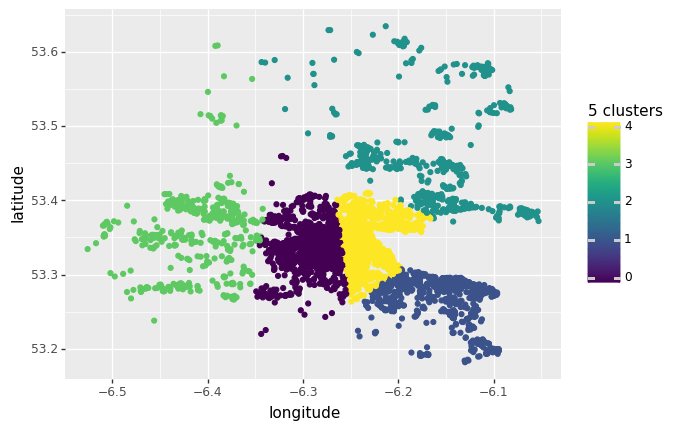

<ggplot: (131494189698)>

In [552]:
%matplotlib inline
import plotnine as p9
import pandas as pd


# k =5 
(p9.ggplot(data=AirDublin,
           mapping=p9.aes(x='longitude', y='latitude',color = '5 clusters')) + p9.geom_point()
)

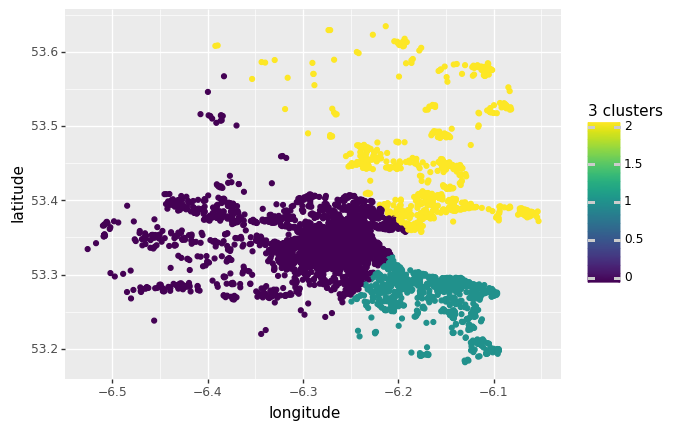

<ggplot: (131498699981)>

In [553]:
# k =3
(p9.ggplot(data=AirDublin,
           mapping=p9.aes(x='longitude', y='latitude',color = '3 clusters')) + p9.geom_point()
)

get how to use plotnine here: https://datacarpentry.org/python-ecology-lesson/07-visualization-ggplot-python/index.html

## Before submission

- Make sure that you can run all cells without errors
- You can do it by clicking `Kernel`, `Restart & Run All` in the menu above
- Make sure that you save the output by pressing Command+S / CTRL+S
- Rename the file from `final_project.ipynb` to `final_project_firstname_lastname.ipynb`


## Submission

- Submit your Jupyter notebook on Blackboard
- Due at 12:00 on Monday, 19th December 2022